In [33]:
%matplotlib notebook
import serial
import numpy as np
from matplotlib import pyplot as plt
from time import time
ser = serial.Serial('COM3', 115200)
# set plot to animated
plt.ion() 

<IPython.core.display.Javascript object>


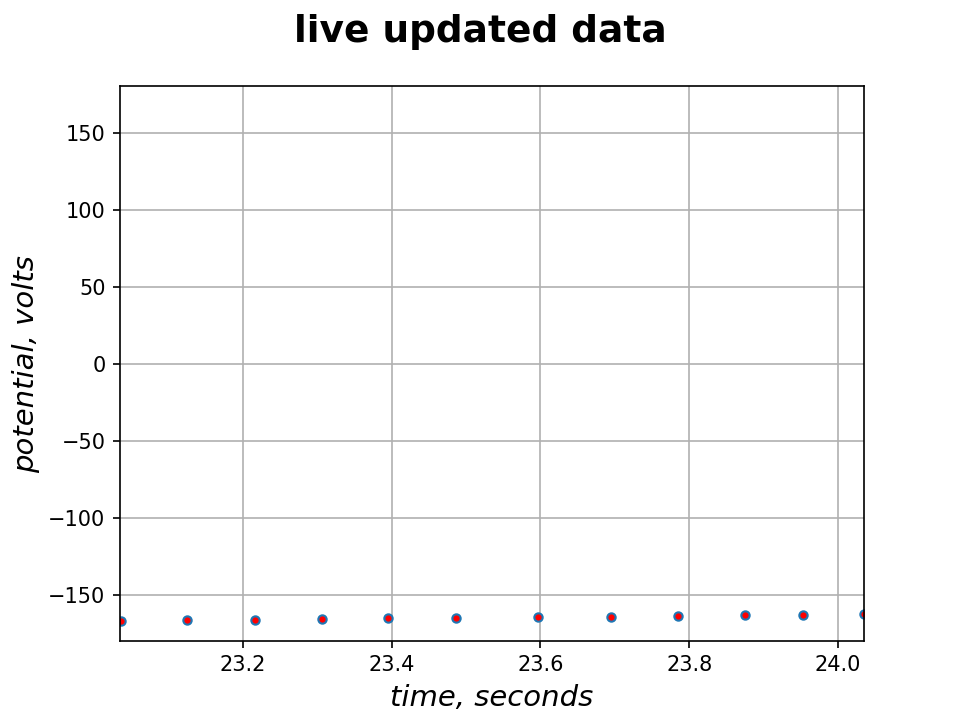

<IPython.core.display.Javascript object>


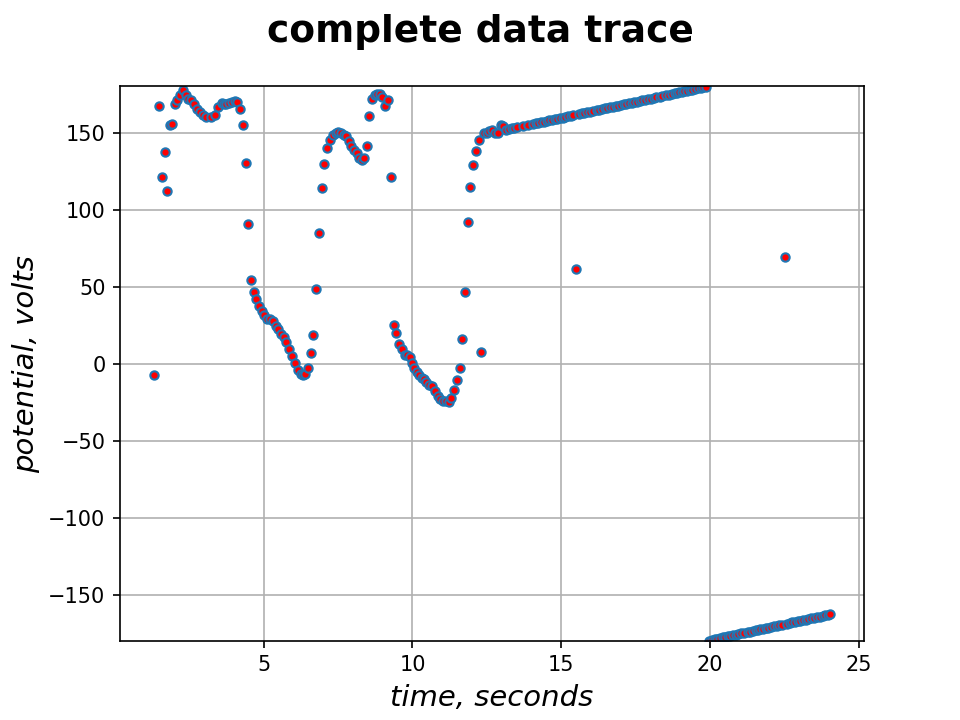

In [34]:
start_time = time()
timepoints = []
ydata = []
yrange = [-180, 180]
view_time = 1 # seconds of data to view at once
duration = 24 # total seconds to collect data
fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

run =  True
# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    #data = ser.readline().split()
    data = ser.readline()
    #print(data)
    data = data.decode().split()
    #print(data)

    #reject if data is cut off
    try:
        if ((len(data[0]) < 4) or (len(data[1]) < 3)):
            continue
        #print(data)
    except IndexError:
        continue
    
    try:
        # store the entire dataset for later
        ydata.append(float(data[0]))
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig1.canvas.draw()
    
fig2 = plt.figure()
fig2.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig2.show()

ser.close()

In [3]:
ser.close()